## Non-Linear Classification


- In many real life problems, the data is not linearly separable,but we need to classify the data. This can be done using by projecting the data to higer dimesions so that it becomes linearly separable.


<img src="img/linearly_separable.PNG" alt="Linear Separable" style="width: 600px;"/>




    



## Projecting data to higher dimensions!
When working with non-linear datasets, we can project orginal feature vectors into higher dimensional space where they can be linearly separated!  

Data in 2-Dimensional Space


<img src="img/circles_low.png" alt="Linear Separable" style="width: 400px;"/>











Data Projected in 3-D Dimensional Space, after processing the original data using a non-linear function.


<img src="img/circles_3d.png" alt="Linear Separable" style="width: 400px;"/>


In [133]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_circles

In [134]:
X,Y = make_circles(n_samples=500,noise=0.02)
print(X.shape,Y.shape)

(500, 2) (500,)


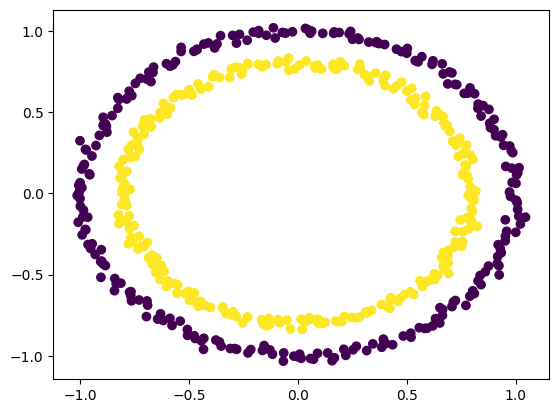

In [135]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [136]:
# Non-linear Transformation 
def phi(X):
    X1 = X[:,0]
    X2 = X[:,1]
    X3 = X1**2 + X2**2
    X_ = np.zeros((X.shape[0],3))
    X_[:,:-1] = X
    X_[:,-1] = X3
    return X_

In [137]:
X_ = phi(X)
print(X_.shape)
print(X[:5,:])
print(X_[:5,:])

(500, 3)
[[-0.58681109  0.52539854]
 [ 0.64139554 -0.50441976]
 [ 0.80158201 -0.11140336]
 [ 0.97352     0.29140773]
 [-0.67006535 -0.43741321]]
[[-0.58681109  0.52539854  0.62039088]
 [ 0.64139554 -0.50441976  0.66582754]
 [ 0.80158201 -0.11140336  0.65494443]
 [ 0.97352     0.29140773  1.03265965]
 [-0.67006535 -0.43741321  0.64031789]]


In [138]:
def plot3d(X,show=True):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111,projection="3d")
    ax.scatter(X[:,0],X[:,1],X[:,2],zdir='z',s=20,c=Y,depthshade=True)
    if show==True:
        plt.show()
    return ax

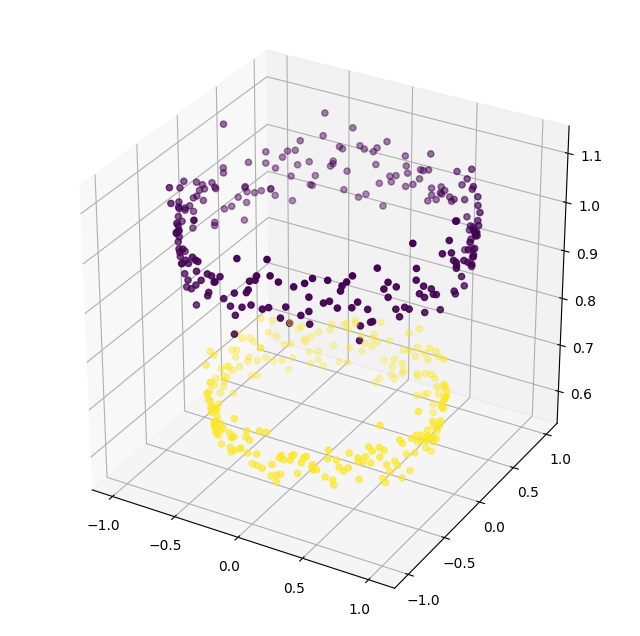

In [139]:
plot3d(X_)

### Logistic Classifier

In [140]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [141]:
lr = LogisticRegression()
# Accuracy on 2D data
acc = cross_val_score(lr,X,Y,cv=5).mean()
print("Accuracy X(2D) is %f"%(acc*100))

Accuracy X(2D) is 43.800000


In [142]:
# Accuracy on 3D data
acc = cross_val_score(lr,X_,Y,cv=5).mean()
print("Accuracy X(3D) is %f"%(acc*100))

Accuracy X(3D) is 100.000000


### Visualize the Decision Boundary

In [143]:
lr.fit(X_,Y)
wts = lr.coef_
bias = lr.intercept_
print(wts)
print(bias)

[[ 7.23856682e-03  2.09533497e-03 -1.09170294e+01]]
[8.96139519]


In [144]:
XX,YY = np.meshgrid(range(-1,2),range(-1,2))
print(XX,YY)

[[-1  0  1]
 [-1  0  1]
 [-1  0  1]] [[-1 -1 -1]
 [ 0  0  0]
 [ 1  1  1]]


In [145]:
Z = -(wts[0,0]*XX + wts[0,1]*YY + bias)/wts[0,2]
print(Z)

[[0.8200089  0.82067196 0.82133501]
 [0.82020084 0.82086389 0.82152694]
 [0.82039277 0.82105582 0.82171888]]


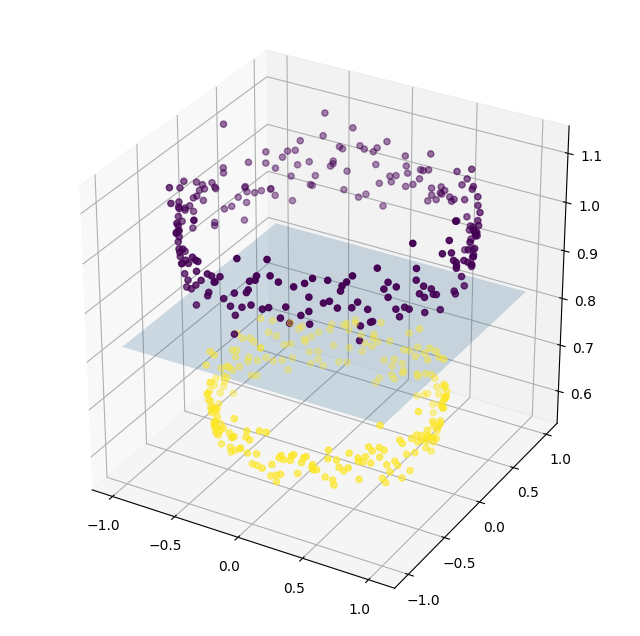

In [146]:
ax = plot3d(X_,False)
ax.plot_surface(XX,YY,Z,alpha=0.2)
plt.show()